In [19]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE"
data = "Rh80_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_150.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9533.321479 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 2.88469e-55 0.000970086
Total flux = 2.086927 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.199844 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000706467
Total flux = 2.093195 Jy at 230 GHz
137:45:36.638 - Start Program


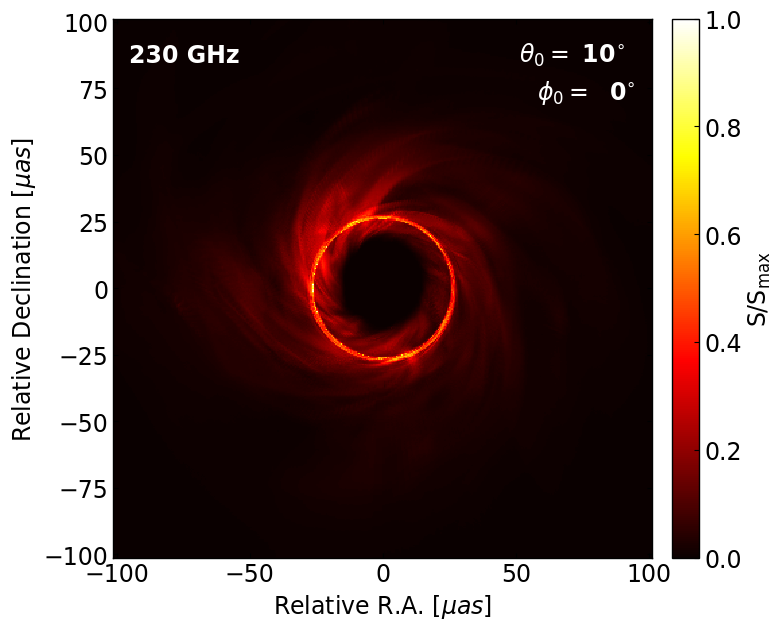

In [10]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE
97, flux: 2.440575 at 9004.234232
98, flux: 2.419963 at 9014.746059
99, flux: 2.402134 at 9023.505435
100, flux: 2.324906 at 9034.016452
101, flux: 2.244509 at 9044.529609
102, flux: 2.198221 at 9053.290056
103, flux: 2.131927 at 9063.802536
104, flux: 2.076335 at 9074.314016
105, flux: 2.099383 at 9084.823874
106, flux: 2.088289 at 9093.581252
107, flux: 2.112537 at 9104.090482
108, flux: 2.142901 at 9114.601360
109, flux: 2.113752 at 9123.359993
110, flux: 2.091594 at 9133.870253
111, flux: 2.092793 at 9144.379583
112, flux: 2.099681 at 9154.889223
113, flux: 2.087161 at 9163.648327
114, flux: 2.075793 at 9174.157990
115, flux: 2.095102 at 9184.666192
116, flux: 2.117106 at 9193.424046
117, flux: 2.096495 at 9203.933544
118, flux: 2.103950 at 9214.444133
119, flux: 2.113397 at 9224.955775
120, flux: 2.098734 at 9233.717169
121, flux: 2.092675 at 9244.228854
122, flux: 2.108245 at 9254.740756
123, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.020542 Jy, the density scale = 3.100000e-18


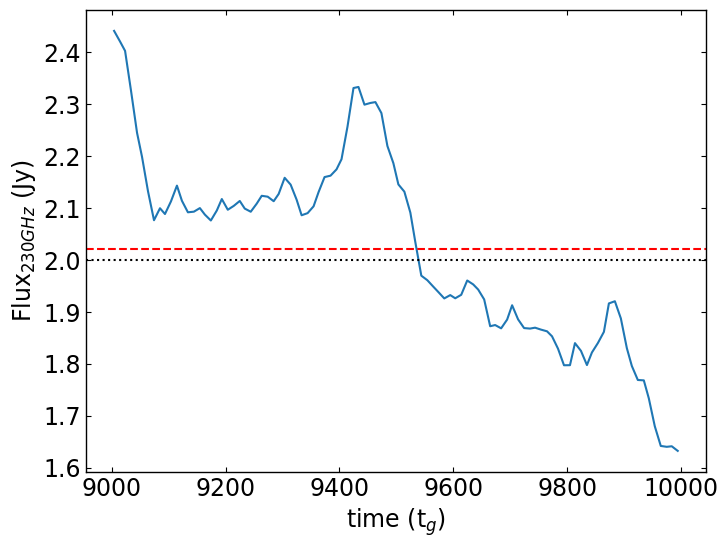

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.440575 Jy at 9004.234232
98:: 2.419963 Jy at 9014.746059
99:: 2.402134 Jy at 9023.505435
100:: 2.324906 Jy at 9034.016452
101:: 2.244509 Jy at 9044.529609
102:: 2.198221 Jy at 9053.290056
103:: 2.131927 Jy at 9063.802536
104:: 2.076335 Jy at 9074.314016
105:: 2.099383 Jy at 9084.823874
106:: 2.088289 Jy at 9093.581252
107:: 2.112537 Jy at 9104.090482
108:: 2.142901 Jy at 9114.601360
109:: 2.113752 Jy at 9123.359993
110:: 2.091594 Jy at 9133.870253
111:: 2.092793 Jy at 9144.379583
112:: 2.099681 Jy at 9154.889223
113:: 2.087161 Jy at 9163.648327
114:: 2.075793 Jy at 9174.157990
115:: 2.095102 Jy at 9184.666192
116:: 2.117106 Jy at 9193.424046
117:: 2.096495 Jy at 9203.933544
118:: 2.103950 Jy at 9214.444133
119:: 2.113397 Jy at 9224.955775
120:: 2.098734 Jy at 9233.717169
121:: 2.092675 Jy at 9244.228854
122:: 2.108245 Jy at 9254.740756
123:: 2.123330 Jy at 9263.502558
124:: 2.121633 Jy at 9274.015079
125:: 2.112929 Jy at 9284.527261
126:: 2.126902 Jy at 9293.287130
127:: 2.15796

In [36]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE
97, flux: 2.635430 at 9004.234232
98, flux: 2.611915 at 9014.746059
99, flux: 2.597071 at 9023.505435
100, flux: 2.520480 at 9034.016452
101, flux: 2.429802 at 9044.529609
102, flux: 2.375556 at 9053.290056
103, flux: 2.297007 at 9063.802536
104, flux: 2.211636 at 9074.314016
105, flux: 2.215727 at 9084.823874
106, flux: 2.201299 at 9093.581252
107, flux: 2.253134 at 9104.090482
108, flux: 2.277258 at 9114.601360
109, flux: 2.234007 at 9123.359993
110, flux: 2.196200 at 9133.870253
111, flux: 2.203134 at 9144.379583
112, flux: 2.214699 at 9154.889223
113, flux: 2.200442 at 9163.648327
114, flux: 2.172598 at 9174.157990
115, flux: 2.170737 at 9184.666192
116, flux: 2.172136 at 9193.424046
117, flux: 2.125193 at 9203.933544
118, flux: 2.100843 at 9214.444133
119, flux: 2.090025 at 9224.955775
120, flux: 2.068451 at 9233.717169
121, flux: 2.056861 at 9244.228854
122, flux: 2.074404 at 9254.740756
123, flux

In [37]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [38]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.052880 Jy, the density scale = 2.900000e-18


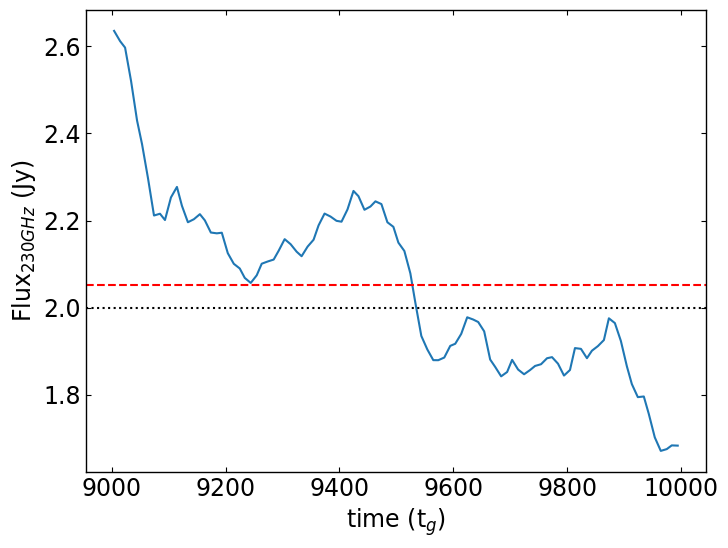

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [40]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.635430 Jy at 9004.234232
98:: 2.611915 Jy at 9014.746059
99:: 2.597071 Jy at 9023.505435
100:: 2.520480 Jy at 9034.016452
101:: 2.429802 Jy at 9044.529609
102:: 2.375556 Jy at 9053.290056
103:: 2.297007 Jy at 9063.802536
104:: 2.211636 Jy at 9074.314016
105:: 2.215727 Jy at 9084.823874
106:: 2.201299 Jy at 9093.581252
107:: 2.253134 Jy at 9104.090482
108:: 2.277258 Jy at 9114.601360
109:: 2.234007 Jy at 9123.359993
110:: 2.196200 Jy at 9133.870253
111:: 2.203134 Jy at 9144.379583
112:: 2.214699 Jy at 9154.889223
113:: 2.200442 Jy at 9163.648327
114:: 2.172598 Jy at 9174.157990
115:: 2.170737 Jy at 9184.666192
116:: 2.172136 Jy at 9193.424046
117:: 2.125193 Jy at 9203.933544
118:: 2.100843 Jy at 9214.444133
119:: 2.090025 Jy at 9224.955775
120:: 2.068451 Jy at 9233.717169
121:: 2.056861 Jy at 9244.228854
122:: 2.074404 Jy at 9254.740756
123:: 2.100988 Jy at 9263.502558
124:: 2.106096 Jy at 9274.015079
125:: 2.110547 Jy at 9284.527261
126:: 2.130781 Jy at 9293.287130
127:: 2.15736

In [21]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE
97, flux: 2.893739 at 9004.234232
98, flux: 2.844257 at 9014.746059
99, flux: 2.818290 at 9023.505435
100, flux: 2.735381 at 9034.016452
101, flux: 2.629105 at 9044.529609
102, flux: 2.553746 at 9053.290056
103, flux: 2.446524 at 9063.802536
104, flux: 2.320134 at 9074.314016
105, flux: 2.309404 at 9084.823874
106, flux: 2.307742 at 9093.581252
107, flux: 2.370635 at 9104.090482
108, flux: 2.357050 at 9114.601360
109, flux: 2.302294 at 9123.359993
110, flux: 2.269071 at 9133.870253
111, flux: 2.303874 at 9144.379583
112, flux: 2.328965 at 9154.889223
113, flux: 2.317548 at 9163.648327
114, flux: 2.294013 at 9174.157990
115, flux: 2.236884 at 9184.666192
116, flux: 2.194481 at 9193.424046
117, flux: 2.140077 at 9203.933544
118, flux: 2.107264 at 9214.444133
119, flux: 2.075719 at 9224.955775
120, flux: 2.044866 at 9233.717169
121, flux: 2.021833 at 9244.228854
122, flux: 2.038054 at 9254.740756
123, flux

In [22]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [23]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.131365 Jy, the density scale = 2.710000e-18


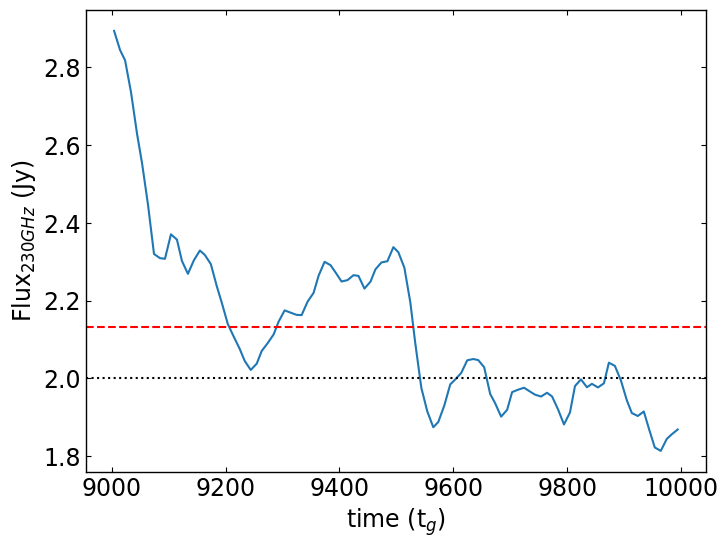

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [25]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.893739 Jy at 9004.234232
98:: 2.844257 Jy at 9014.746059
99:: 2.818290 Jy at 9023.505435
100:: 2.735381 Jy at 9034.016452
101:: 2.629105 Jy at 9044.529609
102:: 2.553746 Jy at 9053.290056
103:: 2.446524 Jy at 9063.802536
104:: 2.320134 Jy at 9074.314016
105:: 2.309404 Jy at 9084.823874
106:: 2.307742 Jy at 9093.581252
107:: 2.370635 Jy at 9104.090482
108:: 2.357050 Jy at 9114.601360
109:: 2.302294 Jy at 9123.359993
110:: 2.269071 Jy at 9133.870253
111:: 2.303874 Jy at 9144.379583
112:: 2.328965 Jy at 9154.889223
113:: 2.317548 Jy at 9163.648327
114:: 2.294013 Jy at 9174.157990
115:: 2.236884 Jy at 9184.666192
116:: 2.194481 Jy at 9193.424046
117:: 2.140077 Jy at 9203.933544
118:: 2.107264 Jy at 9214.444133
119:: 2.075719 Jy at 9224.955775
120:: 2.044866 Jy at 9233.717169
121:: 2.021833 Jy at 9244.228854
122:: 2.038054 Jy at 9254.740756
123:: 2.070692 Jy at 9263.502558
124:: 2.090899 Jy at 9274.015079
125:: 2.113462 Jy at 9284.527261
126:: 2.146403 Jy at 9293.287130
127:: 2.17505

In [26]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE
97, flux: 2.756209 at 9004.234232
98, flux: 2.745923 at 9014.746059
99, flux: 2.785681 at 9023.505435
100, flux: 2.717694 at 9034.016452
101, flux: 2.615655 at 9044.529609
102, flux: 2.532804 at 9053.290056
103, flux: 2.407439 at 9063.802536
104, flux: 2.283781 at 9074.314016
105, flux: 2.325178 at 9084.823874
106, flux: 2.264201 at 9093.581252
107, flux: 2.288132 at 9104.090482
108, flux: 2.316593 at 9114.601360
109, flux: 2.254308 at 9123.359993
110, flux: 2.219988 at 9133.870253
111, flux: 2.308630 at 9144.379583
112, flux: 2.301066 at 9154.889223
113, flux: 2.224357 at 9163.648327
114, flux: 2.028272 at 9174.157990
115, flux: 1.923956 at 9184.666192
116, flux: 1.944617 at 9193.424046
117, flux: 1.956177 at 9203.933544
118, flux: 1.952246 at 9214.444133
119, flux: 1.974322 at 9224.955775
120, flux: 1.936450 at 9233.717169
121, flux: 1.895640 at 9244.228854
122, flux: 1.923841 at 9254.740756
123, flux

In [27]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [28]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.077424 Jy, the density scale = 2.470000e-18


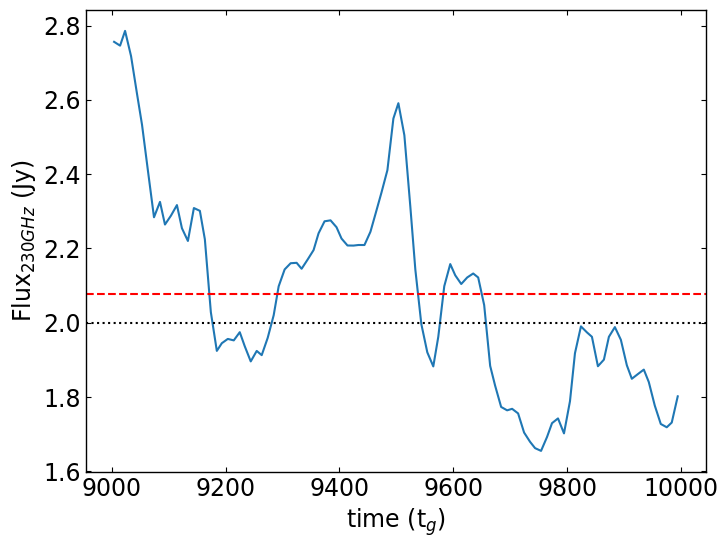

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [30]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.756209 Jy at 9004.234232
98:: 2.745923 Jy at 9014.746059
99:: 2.785681 Jy at 9023.505435
100:: 2.717694 Jy at 9034.016452
101:: 2.615655 Jy at 9044.529609
102:: 2.532804 Jy at 9053.290056
103:: 2.407439 Jy at 9063.802536
104:: 2.283781 Jy at 9074.314016
105:: 2.325178 Jy at 9084.823874
106:: 2.264201 Jy at 9093.581252
107:: 2.288132 Jy at 9104.090482
108:: 2.316593 Jy at 9114.601360
109:: 2.254308 Jy at 9123.359993
110:: 2.219988 Jy at 9133.870253
111:: 2.308630 Jy at 9144.379583
112:: 2.301066 Jy at 9154.889223
113:: 2.224357 Jy at 9163.648327
114:: 2.028272 Jy at 9174.157990
115:: 1.923956 Jy at 9184.666192
116:: 1.944617 Jy at 9193.424046
117:: 1.956177 Jy at 9203.933544
118:: 1.952246 Jy at 9214.444133
119:: 1.974322 Jy at 9224.955775
120:: 1.936450 Jy at 9233.717169
121:: 1.895640 Jy at 9244.228854
122:: 1.923841 Jy at 9254.740756
123:: 1.912498 Jy at 9263.502558
124:: 1.959041 Jy at 9274.015079
125:: 2.019921 Jy at 9284.527261
126:: 2.097858 Jy at 9293.287130
127:: 2.14332

In [31]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE
97, flux: 2.754404 at 9004.234232
98, flux: 2.787940 at 9014.746059
99, flux: 2.802061 at 9023.505435
100, flux: 2.702217 at 9034.016452
101, flux: 2.592249 at 9044.529609
102, flux: 2.515822 at 9053.290056
103, flux: 2.421340 at 9063.802536
104, flux: 2.297298 at 9074.314016
105, flux: 2.240280 at 9084.823874
106, flux: 2.309539 at 9093.581252
107, flux: 2.406190 at 9104.090482
108, flux: 2.495327 at 9114.601360
109, flux: 2.427007 at 9123.359993
110, flux: 2.412431 at 9133.870253
111, flux: 2.524239 at 9144.379583
112, flux: 2.523922 at 9154.889223
113, flux: 2.425503 at 9163.648327
114, flux: 2.068593 at 9174.157990
115, flux: 1.954561 at 9184.666192
116, flux: 1.943672 at 9193.424046
117, flux: 1.965995 at 9203.933544
118, flux: 1.969255 at 9214.444133
119, flux: 1.990868 at 9224.955775
120, flux: 1.964546 at 9233.717169
121, flux: 1.945807 at 9244.228854
122, flux: 1.946579 at 9254.740756
123, flux

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.055025 Jy, the density scale = 2.450000e-18


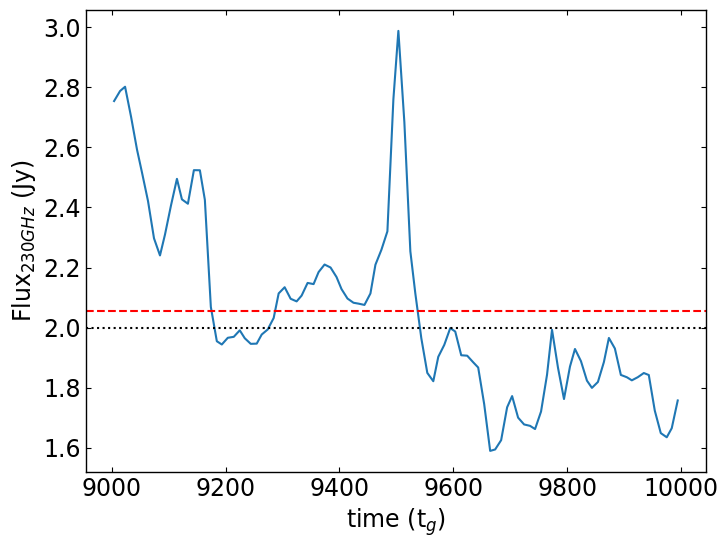

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [35]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.754404 Jy at 9004.234232
98:: 2.787940 Jy at 9014.746059
99:: 2.802061 Jy at 9023.505435
100:: 2.702217 Jy at 9034.016452
101:: 2.592249 Jy at 9044.529609
102:: 2.515822 Jy at 9053.290056
103:: 2.421340 Jy at 9063.802536
104:: 2.297298 Jy at 9074.314016
105:: 2.240280 Jy at 9084.823874
106:: 2.309539 Jy at 9093.581252
107:: 2.406190 Jy at 9104.090482
108:: 2.495327 Jy at 9114.601360
109:: 2.427007 Jy at 9123.359993
110:: 2.412431 Jy at 9133.870253
111:: 2.524239 Jy at 9144.379583
112:: 2.523922 Jy at 9154.889223
113:: 2.425503 Jy at 9163.648327
114:: 2.068593 Jy at 9174.157990
115:: 1.954561 Jy at 9184.666192
116:: 1.943672 Jy at 9193.424046
117:: 1.965995 Jy at 9203.933544
118:: 1.969255 Jy at 9214.444133
119:: 1.990868 Jy at 9224.955775
120:: 1.964546 Jy at 9233.717169
121:: 1.945807 Jy at 9244.228854
122:: 1.946579 Jy at 9254.740756
123:: 1.976929 Jy at 9263.502558
124:: 1.993626 Jy at 9274.015079
125:: 2.032002 Jy at 9284.527261
126:: 2.113762 Jy at 9293.287130
127:: 2.13435